# CNN大課題

## 【課題】CNNとはどういった手法なのか記述せよ

答え：  
CNNは、フィルタ内の領域の情報を畳み込んで作成するConvolution Layerを導入した、Neural Networkのこと。Convolution Layerはフィルタを移動させながら適用することで作成し、フィルタの数だけ作成される。これを重ねて活性化関数で繋いでいくことで、ネットワークを構築する。CNNは全結合層だけでなく、畳み込み層やプーリング層を使うことで位置関係が持つ意味を残しながら特徴を抜き出してくことができるため、点ではなく領域ベースでの特徴抽出が可能になり、画像の移動や変形などに頑健になる。また、エッジなど領域ベースでないとわからない特徴抽出も可能になる。

## 【課題】畳み込み層とプーリング層について記述せよ

答え：  
CNNでは隠れ層は「畳み込み層」と「プーリング層」で構成されます。畳み込み層は、前の層で近くにあるノードにフィルタ処理して特徴マップを得ます。ストライドはフィルタの（畳み込みの）適用間隔のこと。プーリング層は、畳込み層から出力された特徴マップを、さらに縮小して新たな特徴マップとします。この際に着目する領域のどの値を用いるかによって幾つかの手法がある。畳み込み層は画像の局所的な特徴を抽出し、プーリング層は局所的な特徴をまとめあげる処理をしています。つまり、これらの処理の意味するところは、入力画像の特徴を維持しながら画像を縮小処理していることになります。Convolution層とPooling層で出力サイズは次第に小さくなるので、パディングでサイズを増やしたりすると層の数を増やすことができる。パディングは、入力の特徴マップの周辺を何らかの値で埋めること。

## 【課題】CNNの精度を向上させるためにはどのようなことをするのが良いか記述せよ

答え：  
表現力を上げる方法として、フィルタ数を複数にする、全結合部分の改善（ノードの数を増やしたり、全結合層の数を増やしたり）、層を深くしてみるなどの方法が考えられる。
また、上記方法によって生じる過学習や勾配消失のリスク増大を防ぐために、ドロップアウト及びBatch Normalizationなどの方法が考えられる。  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout
from keras.layers import BatchNormalization

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## 【課題】データの読み込み

In [2]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
print('x_train.shape : ',x_train.shape)
print('y_train.shape : ',y_train.shape)
print('x_test.shape : ',x_test.shape)
print('y_test.shape : ',y_test.shape)
print('y_test[0:10] : ',y_test[0:10])

x_train.shape :  (50000, 32, 32, 3)
y_train.shape :  (50000, 1)
x_test.shape :  (10000, 32, 32, 3)
y_test.shape :  (10000, 1)
y_test[0:10] :  [[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]
 [3]
 [1]]


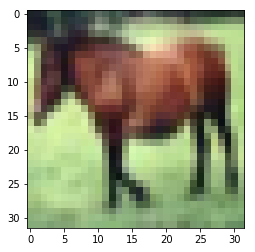

In [4]:
#指定したラベルのインデックスを取得する
tmp  = np.where(y_train==7)[0][0]

plt.imshow(x_train[tmp])

## 【課題】画像をまとめて表示

In [5]:
cifar10_labels = np.array([
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'])

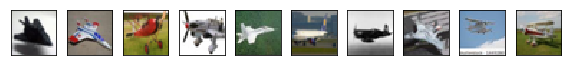

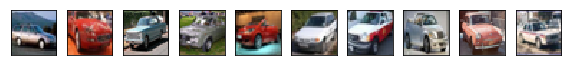

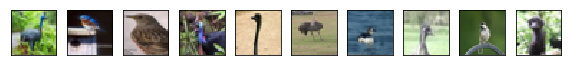

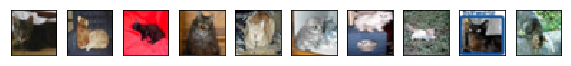

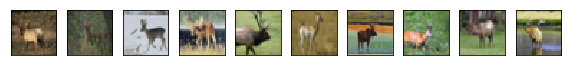

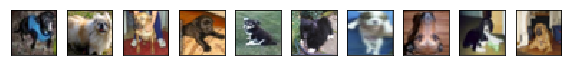

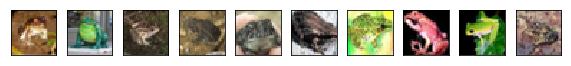

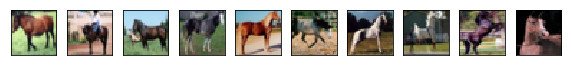

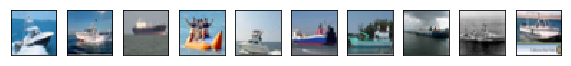

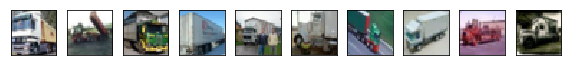

In [6]:
fig = plt.figure(figsize=(32,32))
for i in range(10):
    ax = fig.add_subplot(32, 32, i + 1, xticks=[], yticks=[])
    tmp = np.where(y_train==0)[0][i]
    ax.imshow(x_train[tmp].reshape(32,32,3))

fig = plt.figure(figsize=(32,32))
for i in range(10):
    ax = fig.add_subplot(32, 32, i + 1, xticks=[], yticks=[])
    tmp = np.where(y_train==1)[0][i]
    ax.imshow(x_train[tmp].reshape(32,32,3))
    
fig = plt.figure(figsize=(32,32))
for i in range(10):
    ax = fig.add_subplot(32, 32, i + 1, xticks=[], yticks=[])
    tmp = np.where(y_train==2)[0][i]
    ax.imshow(x_train[tmp].reshape(32,32,3))    

fig = plt.figure(figsize=(32,32))
for i in range(10):
    ax = fig.add_subplot(32, 32, i + 1, xticks=[], yticks=[])
    tmp = np.where(y_train==3)[0][i]
    ax.imshow(x_train[tmp].reshape(32,32,3)) 
    
fig = plt.figure(figsize=(32,32))
for i in range(10):
    ax = fig.add_subplot(32, 32, i + 1, xticks=[], yticks=[])
    tmp = np.where(y_train==4)[0][i]
    ax.imshow(x_train[tmp].reshape(32,32,3))

fig = plt.figure(figsize=(32,32))
for i in range(10):
    ax = fig.add_subplot(32, 32, i + 1, xticks=[], yticks=[])
    tmp = np.where(y_train==5)[0][i]
    ax.imshow(x_train[tmp].reshape(32,32,3))
    
fig = plt.figure(figsize=(32,32))
for i in range(10):
    ax = fig.add_subplot(32, 32, i + 1, xticks=[], yticks=[])
    tmp = np.where(y_train==6)[0][i]
    ax.imshow(x_train[tmp].reshape(32,32,3))    

fig = plt.figure(figsize=(32,32))
for i in range(10):
    ax = fig.add_subplot(32, 32, i + 1, xticks=[], yticks=[])
    tmp = np.where(y_train==7)[0][i]
    ax.imshow(x_train[tmp].reshape(32,32,3)) 
    
fig = plt.figure(figsize=(32,32))
for i in range(10):
    ax = fig.add_subplot(32, 32, i + 1, xticks=[], yticks=[])
    tmp = np.where(y_train==8)[0][i]
    ax.imshow(x_train[tmp].reshape(32,32,3))

fig = plt.figure(figsize=(32,32))
for i in range(10):
    ax = fig.add_subplot(32, 32, i + 1, xticks=[], yticks=[])
    tmp = np.where(y_train==9)[0][i]
    ax.imshow(x_train[tmp].reshape(32,32,3))

In [7]:
# import random

# pos = 1
# #index = 0
# index = random.randint(0, x_test.shape[0]/2)
# i = index


# # plt figure set to 16inch x 16inch(1600pixel x 1600 pixel). 
# plt.figure(figsize=(20,20))

# # draw cifar10 images and label names
# for img in x_test[index:index+100]:
#     plt.subplot(10, 10, pos)
#     plt.imshow(img)
#     plt.axis('off')
#     plt.title( cifar10_labels[y_test[i][0]] )
#     pos += 1
#     i += 1

# plt.show()

## 【課題】大きさの取得

In [8]:
y_train = y_train.reshape(y_train.shape[0])
y_test = y_test.reshape(y_test.shape[0])

In [9]:
#画像サイズを取得
img_rows = x_train[0].shape[1] 
img_cols = x_train[0].shape[0]
#分類する数を取得
#正解ラベルをset型にすることで何種類に分類しているのかを確認
num_classes = len(set(y_train)) 
#入力データの形状を取得
input_shape = x_train.shape[1:4]

## 【課題】正規化

In [10]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

## 【課題】one-hot表現への変換

In [11]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## 【課題】モデルを作成

In [12]:
model=Sequential()

model.add(Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(32,32,3)))
model.add(Conv2D(32,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

## 【課題】このようなモデルにした理由

答え：  
Mnistよりも次元・分類数ともに多かったので、若干だけ、全結合部分のノードを増やし、隠れ層を深くフィルター数を多くしつつ、過学習をを防ぐためにドロップアウトを入れてみた。

## 【課題】CNNの実行

In [13]:
history=model.fit(x_train,y_train,batch_size=128,nb_epoch=5,verbose=1,validation_split=0.2)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 40000 samples, validate on 10000 samples
Epoch 1/5
40000/40000 [==============================] - 391s 10ms/step - loss: 1.6833 - acc: 0.3811 - val_loss: 1.3095 - val_acc: 0.5297
Epoch 2/5
40000/40000 [==============================] - 380s 9ms/step - loss: 1.2271 - acc: 0.5636 - val_loss: 1.0397 - val_acc: 0.6315
Epoch 3/5
40000/40000 [==============================] - 379s 9ms/step - loss: 1.0379 - acc: 0.6350 - val_loss: 0.9295 - val_acc: 0.6744
Epoch 4/5
40000/40000 [==============================] - 394s 10ms/step - loss: 0.9277 - acc: 0.6707 - val_loss: 0.8399 - val_acc: 0.7104
Epoch 5/5
40000/40000 [==============================] - 387s 10ms/step - loss: 0.8392 - acc: 0.7034 - val_loss: 0.7669 - val_acc: 0.7352


In [14]:
import os

# # modelを保存するdirectoryのpath
# RESULT_PATH = "./result"
# # そのdirectoryがなければ作成する。
# if not os.path.exists(RESULT_PATH):
#     os.mkdir(RESULT_PATH)

# # save model to JSON
# model_json = model.to_json() # dictionary like json format
# model_path = os.path.join(RESULT_PATH, "model.json")
# with open(model_path, "w") as json_file:
#     json_file.write(model_json)

#モデルと重みを保存
json_string=model.to_json()
open('cifar10_cnn.json',"w").write(json_string)
model.save_weights('cifar10_cnn.h5')

#モデルの表示
model.summary()

#評価
score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss:',score[0])
print('Test accuracy:',score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
__________